In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.inspection import partial_dependence
from joblib import Parallel, delayed
from tqdm import tqdm
import time

df= pd.read_csv("'final_files/top_30_rain_shited.csv'")

X = df.iloc[:, :-1]  # Features: all columns except the last one
y = df.iloc[:, -1] 

# Start timer
start_time = time.time()

# Train an XGBoost regressor with parallel processing  ## Change according to the clusters
params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.05,
    'max_depth': 15,
    'n_estimators': 250,
    'subsample': 0.8,
    'n_jobs': -1  # Utilize all available CPU cores for training
}
model = XGBRegressor(**params)
model.fit(X, y)  # Train using X and y




/home/fgrslab/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# These are the names which are needed on the plots 
modified_feature_names = ['Elevation [m]','Population','Cloud cover','Humidity [%]','Soil moisture [kg/m²]','Wind speed [m/s]','Tasₘₐₓ [°C]', 'Tasₘᵢₙ [°C]','NDVI','Forest cover fraction [%]','Prev year avg rain [mm]']  # Replace with your actual modified names

/home/fgrslab/.local/lib/python3.10/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


Elapsed time: 6999.62 seconds


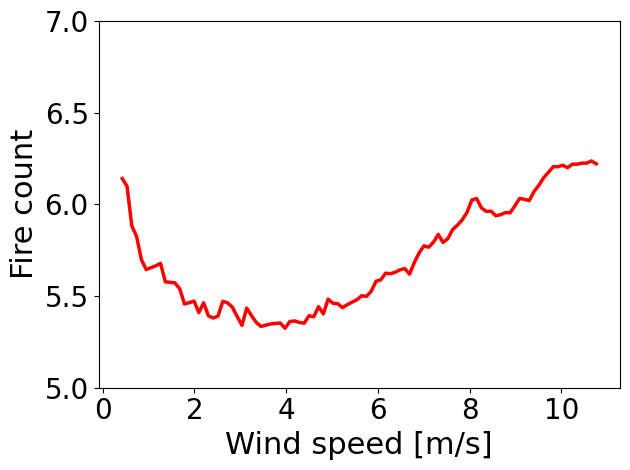

In [ ]:
from matplotlib.ticker import ScalarFormatter

# Define the feature for which we want to plot PDP by name
feature_name = 'windspeed'  # Replace with the actual column name you want to plot

# Find the index of the feature in X
feature_index = list(X.columns).index(feature_name)

# Compute PDP manually
pdp_results = partial_dependence(model, X, [feature_index], grid_resolution=100)
pdp_values = pdp_results['average'][0]
pdp_grid = pdp_results['values'][0]

# Ensure the grid of PDP matches the value range used for ICE
value_range = np.linspace(X[feature_name].min(), X[feature_name].max(), 100)
if len(pdp_grid) != len(value_range):
    value_range = pdp_grid

# Set up the plot
fig, ax = plt.subplots()

# Plot PDP with increased visibility
ax.plot(value_range, pdp_values, color='red', linewidth=2.5, label='PDP')

# Apply ylim to constrain y-axis range
ax.set_ylim([4, 8])  # Adjust to your desired limits

# Labeling the plot
ax.set_xlabel('Wind speed [m/s]', fontsize=22)
ax.set_ylabel('Fire count', fontsize=22)

# Increase tick label size
ax.tick_params(axis='both', which='major', labelsize=20)

# Set scientific notation for x-axis and increase font size (optional). Use when the values are very large
'''formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))
ax.xaxis.set_major_formatter(formatter)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))'''

# Increase font size of the scientific notation
ax.xaxis.get_offset_text().set_fontsize(20)


plt.tight_layout()
# Save the plot as PNG and SVG
plt.savefig('only_pdp/windspeed.png', dpi=600)  # Save as PNG with 300 dpi resolution
# plt.savefig('pdp_plot_with_ylim.svg')  # Save as SVG

# End timer and print elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

# Close the plot to avoid displaying it
plt.show()

In [ ]:
..